In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import RobustScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\cbb.csv")

In [55]:
missing_value=df.isnull().sum()
print("The number of missing values is:" ,missing_value)

The number of missing values is: TEAM             0
CONF             0
G                0
W                0
ADJOE            0
ADJDE            0
BARTHAG          0
EFG_O            0
EFG_D            0
TOR              0
TORD             0
ORB              0
DRB              0
FTR              0
FTRD             0
2P_O             0
2P_D             0
3P_O             0
3P_D             0
ADJ_T            0
WAB              0
POSTSEASON    1134
SEED          1134
YEAR             0
dtype: int64


In [57]:
df.fillna(0, inplace=True)
print(df.isnull().sum())

TEAM          0
CONF          0
G             0
W             0
ADJOE         0
ADJDE         0
BARTHAG       0
EFG_O         0
EFG_D         0
TOR           0
TORD          0
ORB           0
DRB           0
FTR           0
FTRD          0
2P_O          0
2P_D          0
3P_O          0
3P_D          0
ADJ_T         0
WAB           0
POSTSEASON    0
SEED          0
YEAR          0
dtype: int64


In [59]:
df=df[[
    'TEAM', #'CONF', 'G',
    'W', 'ADJOE', 'ADJDE', #'BARTHAG',
    'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB',# 'DRB',
    'FTR',# 'FTRD',
    '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', #'SEED', 'YEAR'
]].copy()

In [61]:
df.columns

Index(['TEAM', 'W', 'ADJOE', 'ADJDE', 'EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB',
       'FTR', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON'],
      dtype='object')

In [63]:
from sklearn.preprocessing import RobustScaler
import pandas as pd


# Select numeric features (exclude non-numeric columns like 'TEAM', 'CONF')
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
X = df[numeric_cols]

# Apply RobustScaler to ALL numeric features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame (optional)
X_scaled = pd.DataFrame(X_scaled, columns=numeric_cols)

In [65]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Apply to numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_clean = remove_outliers_iqr(df, numeric_cols)

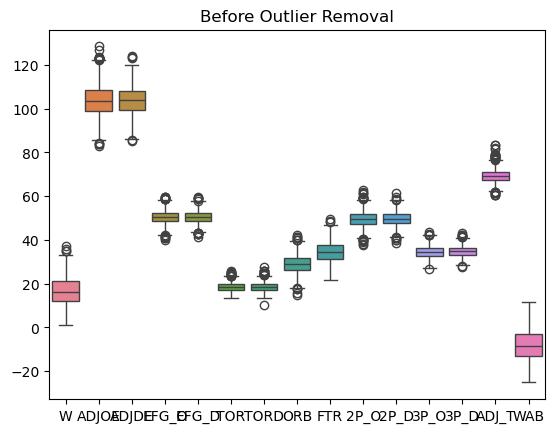

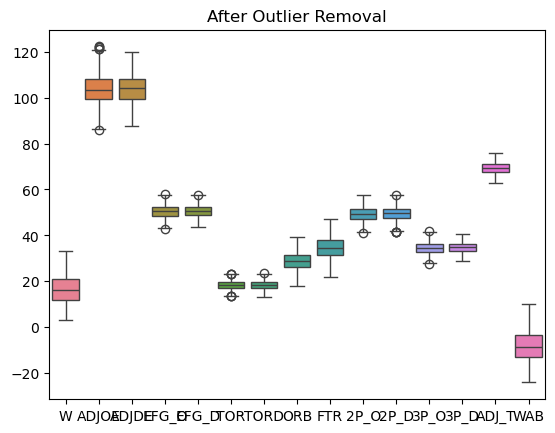

In [67]:
#outliers
# Before removal
sns.boxplot(data=df[numeric_cols])
plt.title("Before Outlier Removal")
plt.show()

# After removal
sns.boxplot(data=df_clean[numeric_cols])
plt.title("After Outlier Removal")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_69156\2648136850.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TEAM', y='ADJOE', data=top_teams, palette='viridis')


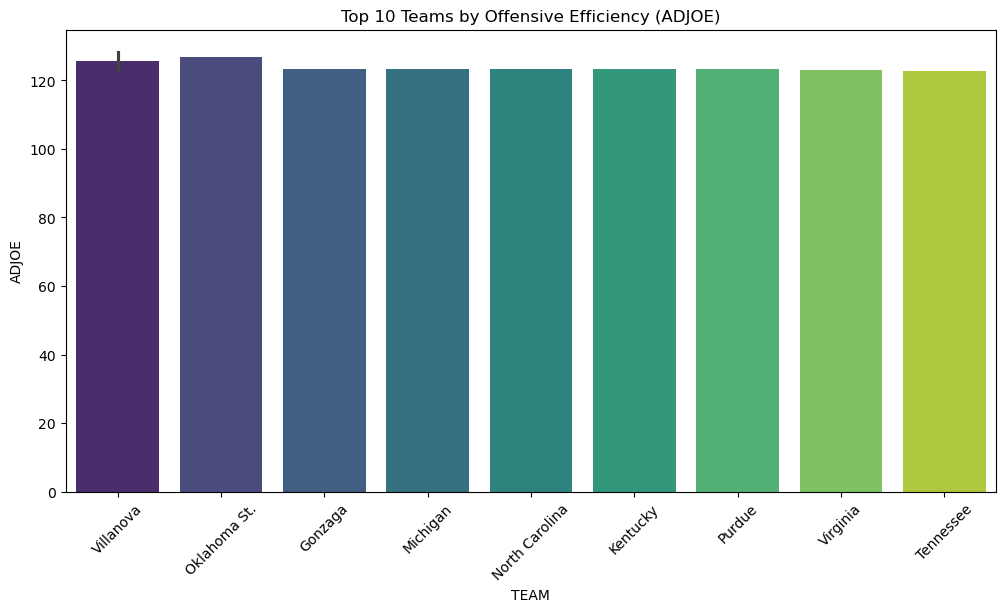

In [68]:
# Top 10 teams by ADJOE
top_teams = df.sort_values('ADJOE', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='TEAM', y='ADJOE', data=top_teams, palette='viridis')
plt.title('Top 10 Teams by Offensive Efficiency (ADJOE)')
plt.xticks(rotation=45)
plt.show()

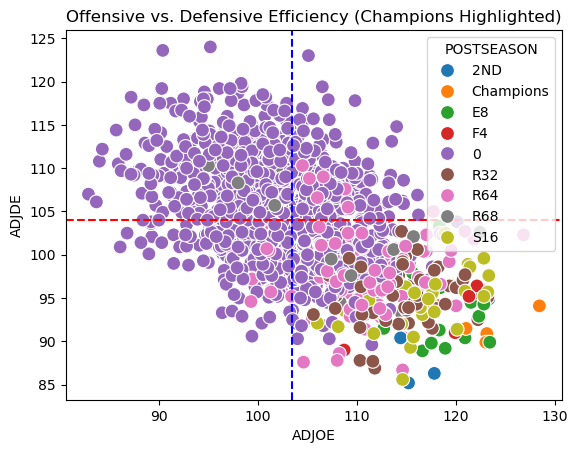

In [69]:
sns.scatterplot(x='ADJOE', y='ADJDE', hue='POSTSEASON', data=df, s=100)
plt.title('Offensive vs. Defensive Efficiency (Champions Highlighted)')
plt.axhline(y=df['ADJDE'].median(), linestyle='--', color='red')  # Median defense
plt.axvline(x=df['ADJOE'].median(), linestyle='--', color='blue') # Median offense
plt.show()

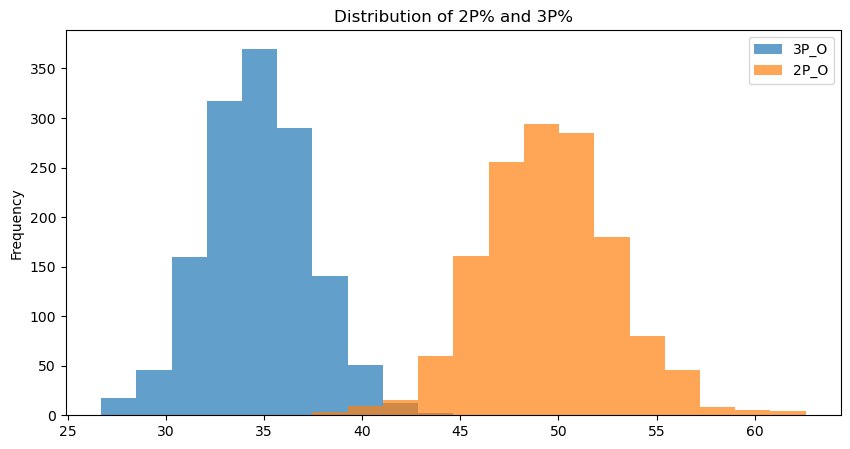

In [70]:
df[['3P_O', '2P_O']].plot.hist(bins=20, alpha=0.7, figsize=(10, 5))
plt.title('Distribution of 2P% and 3P%')
plt.show()

In [71]:

# 1. Label Encoding for 'TEAM'
# ----------------------------------
team_encoder = LabelEncoder()
df['TEAM_ENC'] = team_encoder.fit_transform(df['TEAM'])


# 3. Ordinal Encoding for 'POSTSEASON'
# Define ordinal values (0 already used for "no postseason")
postseason_order = {
    0: 0,        # Already replaced missing values with 0
    'R68': 1,
    'R64': 2,
    'R32': 3,
    'S16': 4,
    'E8': 5,
    'F4': 6,
    '2ND': 7,     # Optional: some datasets use this for final
    'Champions': 8,
    'RunnerUp': 7  # if applicable
}

# Map all values accordingly
df['POSTSEASON_ENC'] = df['POSTSEASON'].map(postseason_order)


In [72]:
df.head()

,TEAM,W,ADJOE,ADJDE,EFG_O,EFG_D,TOR,TORD,ORB,FTR,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,TEAM_ENC,POSTSEASON_ENC
0,North Carolina,33,123.3,94.9,52.6,48.1,15.4,18.2,40.7,32.3,53.9,44.6,32.7,36.2,71.7,8.6,2ND,200,7
1,Villanova,35,123.1,90.9,56.1,46.7,16.3,20.6,28.2,34.1,57.4,44.1,36.2,33.9,66.7,8.9,Champions,332,8
2,Notre Dame,24,118.3,103.3,54.0,49.5,15.3,14.8,32.7,32.9,52.9,46.5,37.4,36.9,65.5,2.3,E8,216,5
3,Virginia,29,119.9,91.0,54.8,48.4,15.1,18.8,29.9,32.1,52.6,46.3,40.3,34.7,61.9,8.6,E8,333,5
4,Kansas,32,120.9,90.4,55.7,45.1,17.8,18.5,32.2,38.6,52.7,43.4,41.3,32.5,70.1,11.6,E8,134,5


In [73]:
df["postseason_order"] = df["POSTSEASON"].map(postseason_order)
# 2. Select Features (NO BARTHAG!)
X = df[["ADJOE", "ADJDE", "WAB"]]  # Only these 3 features
y = df["postseason_order"]

# 3. Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Split Data into Train/Test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Train Multiclass Logistic Regression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# 6. Predict on Test Set
y_pred = model.predict(X_test)

# 7. Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       227
           1       0.00      0.00      0.00         3
           2       0.58      0.42      0.49        26
           3       0.67      0.46      0.55        13
           4       0.14      0.17      0.15         6
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1

    accuracy                           0.86       282
   macro avg       0.26      0.23      0.24       282
weighted avg       0.82      0.86      0.84       282

Confusion Matrix:
 [[224   0   3   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0]
 [ 15   0  11   0   0   0   0   0   0]
 [  3   0   3   6   1   0   0   0   0]
 [  1   0   1   3   1   0   0   0   0]
 [  0   0   1   0   2   0   0   0   0]
 [  0   0   0   0 

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classificati

In [74]:
# Train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune k
knn_model.fit(X_train, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test)

# Evaluate
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       227
           1       0.00      0.00      0.00         3
           2       0.36      0.31      0.33        26
           3       0.33      0.15      0.21        13
           4       0.18      0.33      0.24         6
           5       0.50      0.33      0.40         3
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1

    accuracy                           0.82       282
   macro avg       0.25      0.23      0.24       282
weighted avg       0.79      0.82      0.80       282

KNN Confusion Matrix:
 [[219   0   7   1   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0]
 [ 16   0   8   2   0   0   0   0   0]
 [  2   0   4   2   5   0   0   0   0]
 [  0   0   3   1   2   0   0   0   0]
 [  1   0   0   0   1   1   0   0   0]
 [  0   0 

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [76]:
# Train Decision Tree
tree_model = DecisionTreeClassifier(random_state=42, max_depth=5)  # You can tune max_depth
tree_model.fit(X_train, y_train)

# Predict
y_pred_tree = tree_model.predict(X_test)

# Evaluate
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       227
           1       0.00      0.00      0.00         3
           2       0.32      0.27      0.29        26
           3       0.20      0.31      0.24        13
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1

    accuracy                           0.80       282
   macro avg       0.16      0.17      0.16       282
weighted avg       0.78      0.80      0.79       282

Decision Tree Confusion Matrix:
 [[215   0  10   2   0   0   0   0   0]
 [  2   0   1   0   0   0   0   0   0]
 [ 13   0   7   6   0   0   0   0   0]
 [  2   0   2   4   5   0   0   0   0]
 [  0   0   2   4   0   0   0   0   0]
 [  0   0   0   2   0   0   0

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [77]:
# Train SVM
svm_model = SVC(kernel='rbf', C=1.0, decision_function_shape='ovr')  # 'rbf' kernel by default
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Evaluate
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.95       227
           1       0.00      0.00      0.00         3
           2       0.56      0.38      0.45        26
           3       1.00      0.15      0.27        13
           4       0.15      0.33      0.21         6
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1

    accuracy                           0.85       282
   macro avg       0.29      0.21      0.21       282
weighted avg       0.83      0.85      0.82       282

SVM Confusion Matrix:
 [[225   0   2   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0]
 [ 16   0  10   0   0   0   0   0   0]
 [  4   0   2   2   5   0   0   0   0]
 [  1   0   3   0   2   0   0   0   0]
 [  0   0   1   0   2   0   0   0   0]
 [  0   0 

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [78]:
# Predictions
y_pred_logistic = model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

# Accuracy scores
acc_logistic = accuracy_score(y_test, y_pred_logistic)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_tree = accuracy_score(y_test, y_pred_tree)
acc_svm = accuracy_score(y_test, y_pred_svm)

# Print comparison
print("Model Performance Comparison:")
print(f"Logistic Regression Accuracy: {acc_logistic:.4f}")
print(f"K-Nearest Neighbors Accuracy: {acc_knn:.4f}")
print(f"Decision Tree Accuracy: {acc_tree:.4f}")
print(f"Support Vector Machine Accuracy: {acc_svm:.4f}")

Model Performance Comparison:
Logistic Regression Accuracy: 0.8582
K-Nearest Neighbors Accuracy: 0.8227
Decision Tree Accuracy: 0.8014
Support Vector Machine Accuracy: 0.8475


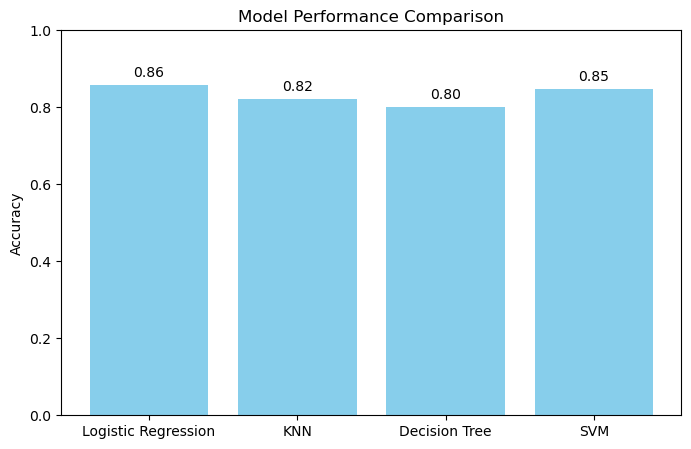

In [80]:
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']
accuracies = [acc_logistic, acc_knn, acc_tree, acc_svm]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center')
plt.show()